In [52]:
# Importing libraries for data processing, visualization, and machine learning

# Data manipulation and processing
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and CSV file handling

# Data visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Advanced data visualization based on Matplotlib

# Data preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler

# Machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# McNemar test
from statsmodels.stats.contingency_tables import mcnemar

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Model validation
from sklearn.model_selection import train_test_split
# Feature extraction
from sklearn.decomposition import PCA
# Feature selection
from sklearn.feature_selection import SelectFdr, f_classif

In [53]:
# Load the dataset into a DataFrame
lung_cancer_dataset = pd.read_csv('lung_cancer.csv')

# Display the first few rows of the dataset to understand its structure
lung_cancer_dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,No,Yes,NO
1,F,55,Yes,No,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,NO
2,F,78,No,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,YES
3,M,60,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,YES
4,F,80,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,NO


In [54]:
# Display the structure of the dataset, including the number of entries and data types of each column
lung_cancer_dataset.info()

# Display basic statistics for the dataset to get an overview of numerical features
lung_cancer_dataset.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   object
 3   YELLOW_FINGERS         3000 non-null   object
 4   ANXIETY                3000 non-null   object
 5   PEER_PRESSURE          3000 non-null   object
 6   CHRONIC_DISEASE        3000 non-null   object
 7   FATIGUE                3000 non-null   object
 8   ALLERGY                3000 non-null   object
 9   WHEEZING               3000 non-null   object
 10  ALCOHOL_CONSUMING      3000 non-null   object
 11  COUGHING               3000 non-null   object
 12  SHORTNESS_OF_BREATH    3000 non-null   object
 13  SWALLOWING_DIFFICULTY  3000 non-null   object
 14  CHEST_PAIN             3000 non-null   object
 15  LUNG_CANCER          

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
count,3000,3000.000000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
unique,2,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,M,NaN,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,YES
freq,1514,NaN,1527,1542,1518,1503,1529,1531,1520,1508,1526,1532,1536,1531,1504,1518
mean,NaN,55.169000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,14.723746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#Check for null values in the dataset
lung_cancer_dataset.isnull().sum() 

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [56]:
#No of rows and columns in the dataset
lung_cancer_dataset.shape

(3000, 16)

In [57]:
label = "LUNG_CANCER"
#list of features if the element is not "Lung Cancer"
features = [element for element in lung_cancer_dataset.columns if element != label]
#list of categorical features if the element is not age
categorical_features = [element for element in features if element != "AGE"]

In [58]:
#data is a data frame containing the columns specified in the features list
data = lung_cancer_dataset[features]
#target is isolated with the column "Lung cancer" for the model to predict
target = lung_cancer_dataset[label]

In [59]:
# Encode the target labels (i.e., the label column)
# Label encoding converts categorical labels into numeric form, which is required for machine learning algorithms
my_label_enc = LabelEncoder()
target = my_label_enc.fit_transform(target)

In [60]:
# Ordinal Encoder is used to transform categorical features into numerical values.
my_ord_enc = OrdinalEncoder()
# Replacing the values of categorical features with ordinal encoded values. 
data[categorical_features] = my_ord_enc.fit_transform(data[categorical_features])
# Scaling the numerical features so that they are within a specific range [0, 1]
my_minmax_scaler = MinMaxScaler()
# Based on the minimum and maximum values, the values are set between 0 and 1
data[["AGE"]] = my_minmax_scaler.fit_transform(data[["AGE"]])
data.head()

C:\Users\97798\AppData\Local\Temp\ipykernel_3408\1120627390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[categorical_features] = my_ord_enc.fit_transform(data[categorical_features])
C:\Users\97798\AppData\Local\Temp\ipykernel_3408\1120627390.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["AGE"]] = my_minmax_scaler.fit_transform(data[["AGE"]])


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,1.0,0.70,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.50,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.96,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
3,1.0,0.60,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.00,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0


In [61]:
data.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
GENDER,1.000000,0.010966,0.028505,-0.014412,0.023891,-0.010019,-0.008488,-0.002193,-0.013211,0.009284,0.009173,0.005534,-0.012228,0.016478,0.001309
AGE,0.010966,1.000000,0.020289,-0.016101,-0.030051,-0.003850,0.025655,0.002322,-0.024915,0.018212,0.020704,0.024909,0.015873,0.001688,0.005426
SMOKING,0.028505,0.020289,1.000000,-0.001497,-0.055562,-0.032041,0.045697,0.019635,0.004908,0.000571,0.003022,0.011722,-0.015772,-0.001706,-0.031387
YELLOW_FINGERS,-0.014412,-0.016101,-0.001497,1.000000,0.012342,0.011394,-0.013216,-0.010761,-0.005709,0.004151,0.027167,0.010076,-0.034018,0.018590,-0.006595
ANXIETY,0.023891,-0.030051,-0.055562,0.012342,1.000000,-0.024692,0.016903,-0.006250,-0.001174,-0.016065,-0.001542,-0.017082,-0.034967,0.033762,0.015969
PEER_PRESSURE,-0.010019,-0.003850,-0.032041,0.011394,-0.024692,1.000000,-0.021299,-0.017378,0.011361,-0.011344,0.013967,-0.012627,-0.028723,0.015962,-0.039339
CHRONIC_DISEASE,-0.008488,0.025655,0.045697,-0.013216,0.016903,-0.021299,1.000000,0.011071,-0.019597,0.022108,-0.028341,-0.003747,-0.020212,0.016406,-0.013951
FATIGUE,-0.002193,0.002322,0.019635,-0.010761,-0.006250,-0.017378,0.011071,1.000000,0.004944,0.015227,0.000309,-0.001560,0.029519,0.010244,0.024617
ALLERGY,-0.013211,-0.024915,0.004908,-0.005709,-0.001174,0.011361,-0.019597,0.004944,1.000000,0.005405,-0.011772,-0.045632,-0.042363,0.012946,0.018704
WHEEZING,0.009284,0.018212,0.000571,0.004151,-0.016065,-0.011344,0.022108,0.015227,0.005405,1.000000,-0.004093,0.016118,-0.012132,-0.023449,-0.016015


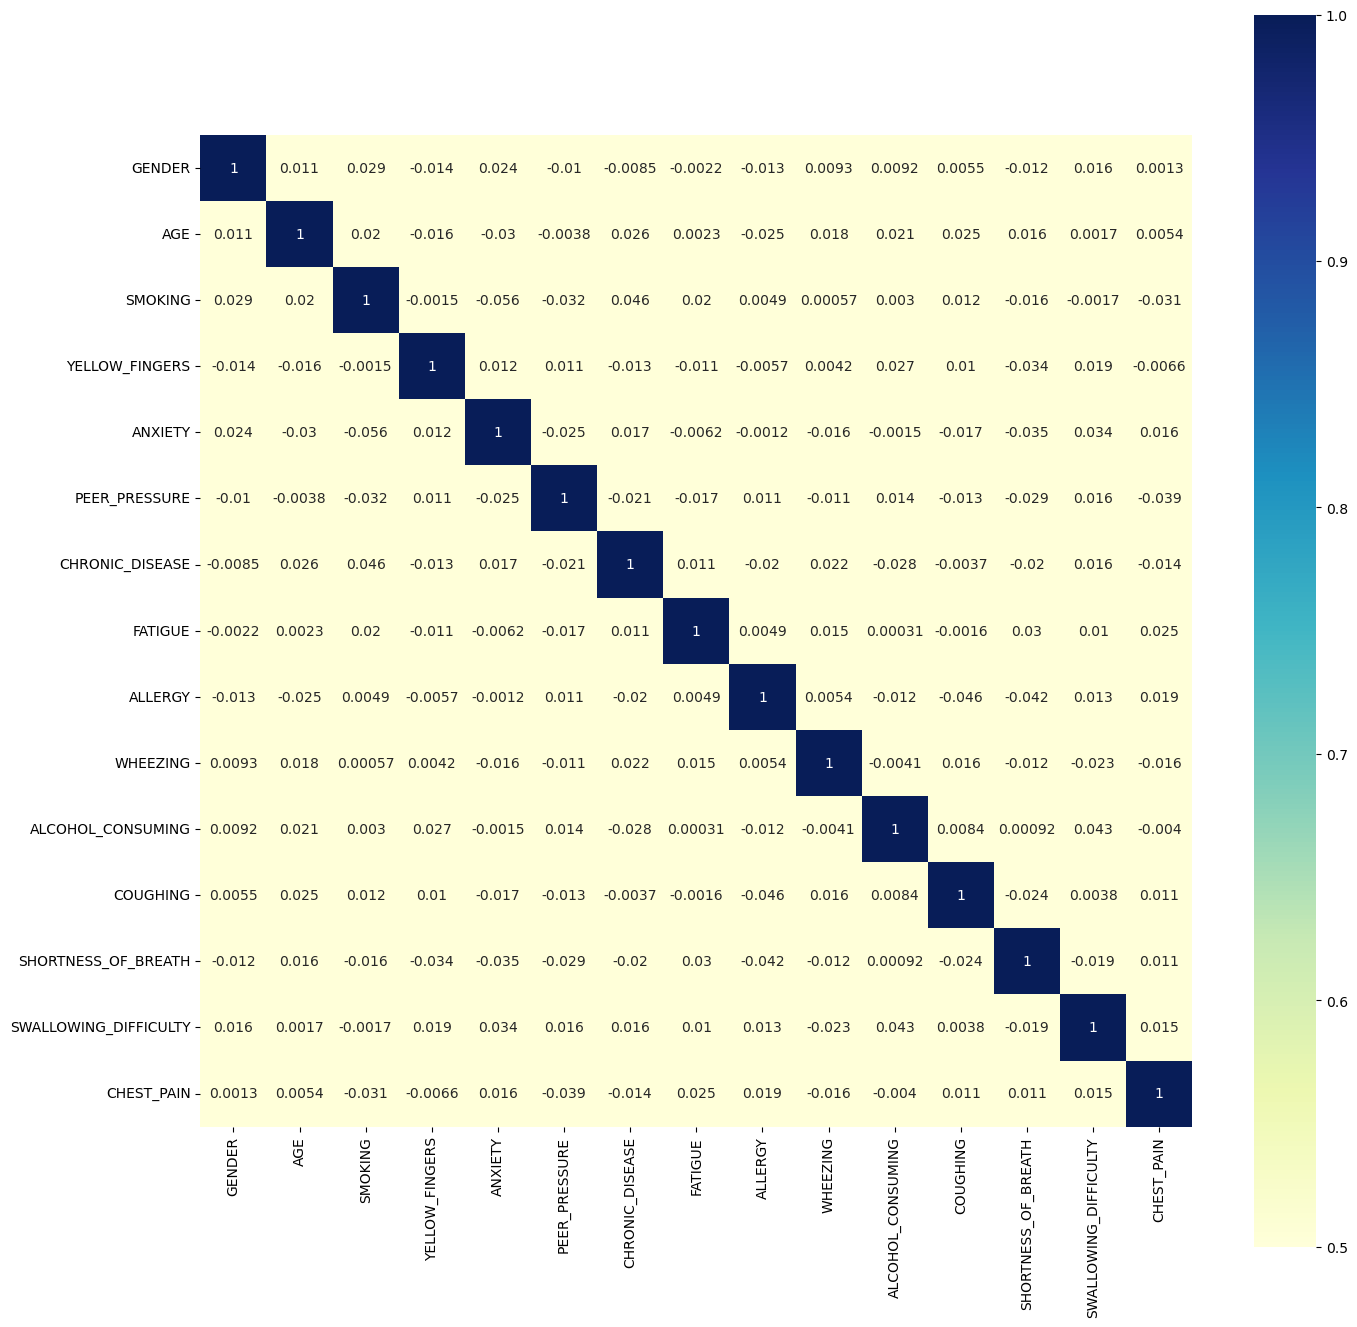

In [62]:
# Now creating a correlation matrix to understand the relationship between the features
corrmat = data.corr()
plt.subplots(figsize=(16,16))
sns.heatmap(corrmat,annot=True, square=True, vmin=0.5, vmax=1,cmap="YlGnBu");

In [63]:
X = data
y = target

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
print(data.corr()["GENDER"].abs().sort_values(ascending=False))

GENDER                   1.000000
SMOKING                  0.028505
ANXIETY                  0.023891
SWALLOWING_DIFFICULTY    0.016478
YELLOW_FINGERS           0.014412
ALLERGY                  0.013211
SHORTNESS_OF_BREATH      0.012228
AGE                      0.010966
PEER_PRESSURE            0.010019
WHEEZING                 0.009284
ALCOHOL_CONSUMING        0.009173
CHRONIC_DISEASE          0.008488
COUGHING                 0.005534
FATIGUE                  0.002193
CHEST_PAIN               0.001309
Name: GENDER, dtype: float64


KNN Algorithm Implementation.

Accuracy score for KNN:  71.33333333333334 

Confusion Matrix for KNN: 
[[200  87]
 [ 85 228]]
Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       287
           1       0.72      0.73      0.73       313

    accuracy                           0.71       600
   macro avg       0.71      0.71      0.71       600
weighted avg       0.71      0.71      0.71       600



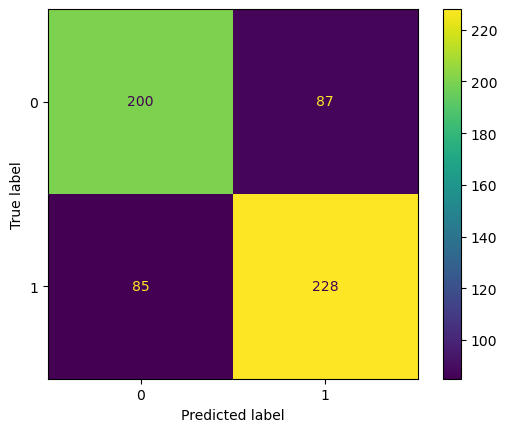

In [66]:
KNN = KNeighborsClassifier()
KNN.fit(X, y)
knn_predictions = KNN.predict(X_test)
knn_value = (accuracy_score(y_test, knn_predictions)*100)
print("Accuracy score for KNN: ", knn_value, "\n")
print("Confusion Matrix for KNN: ")
cm = confusion_matrix(y_test, knn_predictions)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=KNN.classes_)
disp.plot()
print("Classification Report for KNN: ")
print(classification_report(y_test, knn_predictions))

SVM Algorithm Implementation

Accuracy score for SVM:  70.0 

Confusion Matrix for SVM: 
[[190  97]
 [ 83 230]]
Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       287
           1       0.70      0.73      0.72       313

    accuracy                           0.70       600
   macro avg       0.70      0.70      0.70       600
weighted avg       0.70      0.70      0.70       600



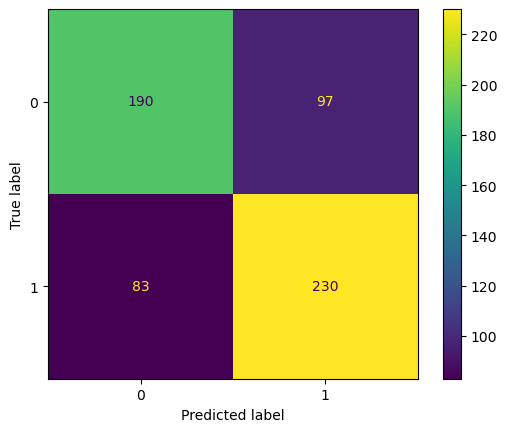

In [67]:
SVM = SVC()
SVM.fit(X, y)
svm_predictions = SVM.predict(X_test)
svm_value = (accuracy_score(y_test, svm_predictions)*100)
print("Accuracy score for SVM: ", svm_value, "\n")
print("Confusion Matrix for SVM: ")
cm = confusion_matrix(y_test, svm_predictions)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=SVM.classes_)
disp.plot()
print("Classification Report for SVM: ")
print(classification_report(y_test, svm_predictions))

Mc Nemars Test as KNN and SVM have similar predictions

In [68]:
# Contingency table counts
n01 = np.sum((knn_predictions == y_test) & (svm_predictions != y_test))
n10 = np.sum((knn_predictions != y_test) & (svm_predictions == y_test))

# Create contingency table
contingency_table = np.array([[0, n01], [n10, 0]])

# Perform McNemar's test
result = mcnemar(contingency_table, exact=True)
print(f'Chi-squared: {result.statistic}, p-value: {result.pvalue}')

Chi-squared: 85.0, p-value: 0.5999362771492702


Decision Tree Classifier Implementation

Accuracy score for Decision Tree:  100.0 

Confusion Matrix for Decision Tree: 
[[287   0]
 [  0 313]]
Classification Report for Decision Tree: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       313

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



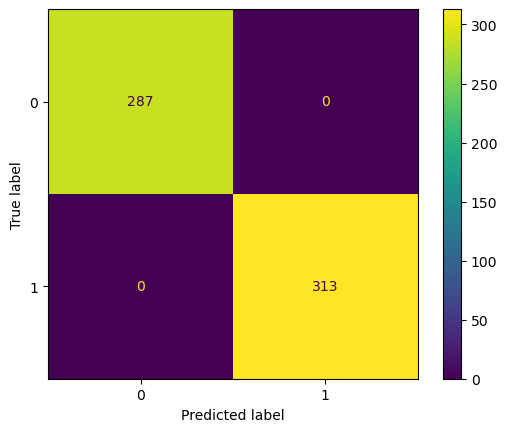

In [69]:
# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Fit the model on the training data
dtc.fit(X, y)

# Predict on the test data
dtc_predictions = dtc.predict(X_test)

# Calculate the accuracy score
dtc_accuracy = accuracy_score(y_test, dtc_predictions) * 100
print("Accuracy score for Decision Tree: ", dtc_accuracy, "\n")

# Print the confusion matrix
print("Confusion Matrix for Decision Tree: ")
dtc_cm = confusion_matrix(y_test, dtc_predictions)
print(dtc_cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=dtc_cm,
                              display_labels=dtc.classes_)
disp.plot()

# Print the classification report
print("Classification Report for Decision Tree: ")
print(classification_report(y_test, dtc_predictions))

Random Forest Classifier Implementation

Accuracy score for RF:  100.0 

Confusion Matrix for RF: 
[[287   0]
 [  0 313]]
Classification Report for RF: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       313

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



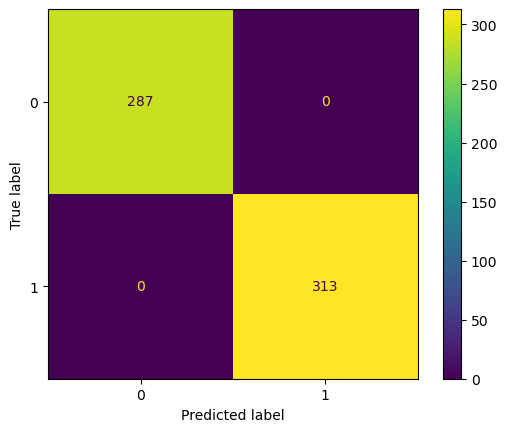

In [70]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X, y)
rf_predictions = RF.predict(X_test)
rf_value = (accuracy_score(y_test, rf_predictions)*100)
print("Accuracy score for RF: ", rf_value, "\n")
print("Confusion Matrix for RF: ")
cm = confusion_matrix(y_test, rf_predictions)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot()
print("Classification Report for RF: ")
print(classification_report(y_test, rf_predictions))

Mc Nemar's Test as DTC and RF have similar predictions

In [71]:
# Contingency table counts
n01 = np.sum((dtc_predictions == y_test) & (rf_predictions != y_test))
n10 = np.sum((dtc_predictions != y_test) & (rf_predictions == y_test))

# Create contingency table
contingency_table = np.array([[0, n01], [n10, 0]])

# Perform McNemar's test
result = mcnemar(contingency_table, exact=True)
print(f'Chi-squared: {result.statistic}, p-value: {result.pvalue}')

Chi-squared: 0.0, p-value: 1.0


Principal Component Analysis

Explained variance ratio: [0.07563169 0.07292279]


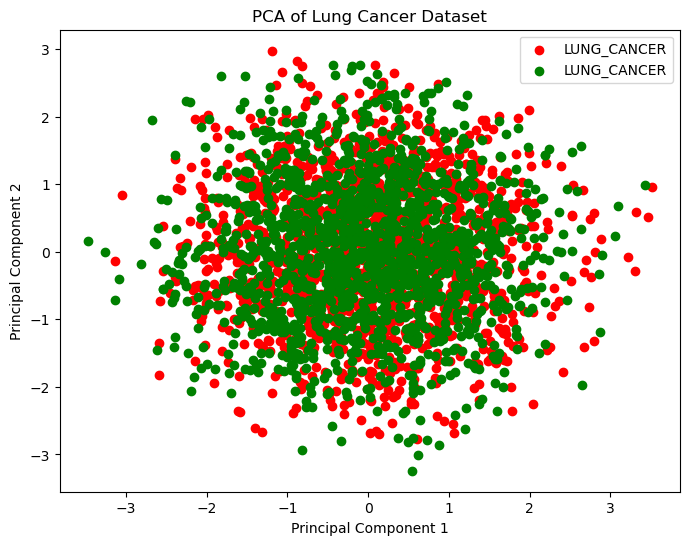

In [72]:
# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)
# Show the explained variance ratio of each component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Convert to a DataFrame for easier plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Plot the results
plt.figure(figsize=(8, 6))
colors = ['r', 'g']
for i, color in enumerate(colors):
    plt.scatter(df_pca.loc[df_pca['target'] == i, 'PC1'], 
                df_pca.loc[df_pca['target'] == i, 'PC2'], 
                color=color, label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Lung Cancer Dataset')
plt.show()

KNN after PCA

Accuracy score for KNN:  48.333333333333336 

Confusion Matrix for KNN: 
[[130 172]
 [138 160]]
Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.49      0.43      0.46       302
           1       0.48      0.54      0.51       298

    accuracy                           0.48       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.48      0.48      0.48       600



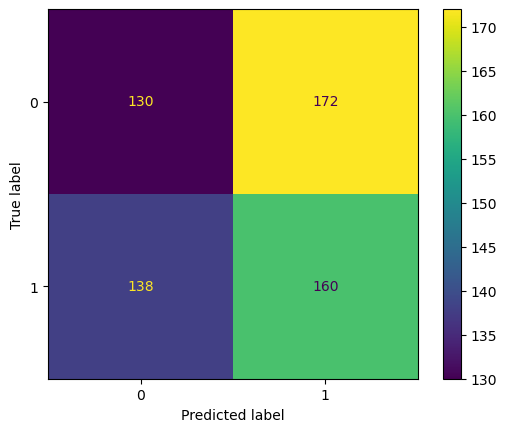

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
# KNN Implementation
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)

# Evaluation
knn_value = (accuracy_score(y_test, predictions) * 100)
print("Accuracy score for KNN: ", knn_value, "\n")
print("Confusion Matrix for KNN: ")
cm = confusion_matrix(y_test, predictions)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN.classes_)
disp.plot()
print("Classification Report for KNN: ")
print(classification_report(y_test, predictions))

SVM after PCA

Accuracy score for SVM:  49.666666666666664 

Confusion Matrix for SVM: 
[[ 78 224]
 [ 78 220]]
Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.50      0.26      0.34       302
           1       0.50      0.74      0.59       298

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.47       600
weighted avg       0.50      0.50      0.47       600



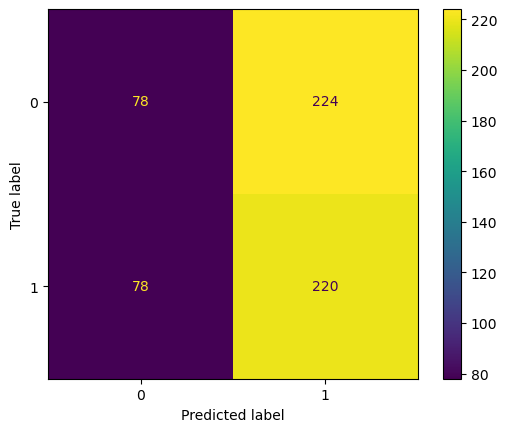

In [74]:
# SVM Implementation
SVM = SVC()
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)

#Evaluation
svm_value = (accuracy_score(y_test, predictions) * 100)
print("Accuracy score for SVM: ", svm_value, "\n")
print("Confusion Matrix for SVM: ")
cm = confusion_matrix(y_test, predictions)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM.classes_)
disp.plot()
print("Classification Report for SVM: ")
print(classification_report(y_test, predictions))


DTC After PCA

Accuracy score for Decision Tree:  50.0 

Confusion Matrix for Decision Tree: 
[[141 161]
 [139 159]]
Classification Report for Decision Tree: 
              precision    recall  f1-score   support

           0       0.50      0.47      0.48       302
           1       0.50      0.53      0.51       298

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600



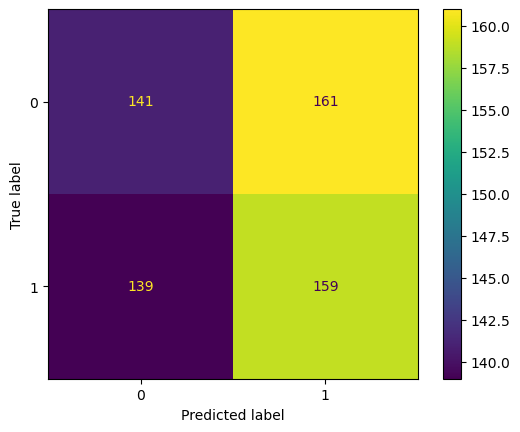

In [75]:
# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Fit the model on the training data
dtc.fit(X_train, y_train)

# Predict on the test data
dtc_predictions = dtc.predict(X_test)

# Calculate the accuracy score
dtc_accuracy = accuracy_score(y_test, dtc_predictions) * 100
print("Accuracy score for Decision Tree: ", dtc_accuracy, "\n")

# Print the confusion matrix
print("Confusion Matrix for Decision Tree: ")
dtc_cm = confusion_matrix(y_test, dtc_predictions)
print(dtc_cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=dtc_cm,
                              display_labels=dtc.classes_)
disp.plot()

# Print the classification report
print("Classification Report for Decision Tree: ")
print(classification_report(y_test, dtc_predictions))

False Discovery Rate (Feature Selection)

In [76]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply FDR for feature selection
fdr_selector = SelectFdr(f_classif, alpha=0.05)
X_fdr = fdr_selector.fit_transform(X_scaled, y)

# Check the shape of the selected features
print("Original number of features:", X.shape[1])
print("Number of features selected by FDR:", X_fdr.shape[1])

# Convert to a DataFrame for easier plotting
num_selected_features = X_fdr.shape[1]  # Get the number of features selected
df_fdr = pd.DataFrame(data=X_fdr, columns=[f'Feature {i+1}' for i in range(num_selected_features)])
df_fdr['target'] = y

# Check if at least two features were selected
if num_selected_features >= 2:
    # Plot the results using the first two selected features
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g']
    for i, color in enumerate(colors):
        plt.scatter(df_fdr.loc[df_fdr['target'] == i, 'Feature 1'], 
                    df_fdr.loc[df_fdr['target'] == i, 'Feature 2'], 
                    color=color, label=f'Class {i}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Feature Selection with FDR')
    plt.show()
else:
    print(f"Only {num_selected_features} feature(s) were selected by FDR. Not enough to plot Feature 1 vs Feature 2.")

Original number of features: 15
Number of features selected by FDR: 0
Only 0 feature(s) were selected by FDR. Not enough to plot Feature 1 vs Feature 2.


c:\Users\97798\miniconda3\envs\myenv\Lib\site-packages\sklearn\feature_selection\_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


Margin Based Refinement for SVM

              precision    recall  f1-score   support

           0       0.50      0.49      0.49       445
           1       0.51      0.51      0.51       455

    accuracy                           0.50       900
   macro avg       0.50      0.50      0.50       900
weighted avg       0.50      0.50      0.50       900

Confusion Matrix for SVM: 
[[220 225]
 [224 231]]


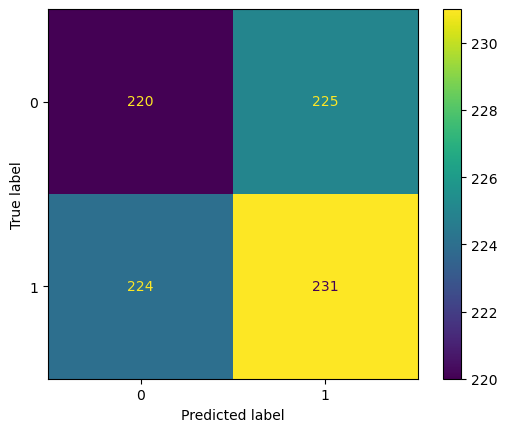

In [77]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()

# Fit only on training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))
# Compute the confusion matrix
svm_cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix for SVM: ")
print(svm_cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm_model.classes_)
disp.plot()

# Display the plot
plt.show()
